<a href="https://colab.research.google.com/github/sarincr/Time-series-analysis-using-Python/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import io

In [0]:
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [9]:
from google.colab import files
uploaded = files.upload()

Saving DataSet.csv to DataSet.csv


In [0]:
df = pd.read_csv(io.StringIO(uploaded['DataSet.csv'].decode('utf-8')))

In [13]:
df.head()

,time,power (W)
0,2019-12-01 04:00:00,0
1,2019-12-01 04:01:00,0
2,2019-12-01 04:02:00,0
3,2019-12-01 04:03:00,0
4,2019-12-01 04:04:00,0


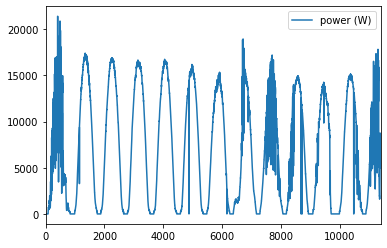

In [14]:
df.plot()

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [16]:
df.head()

,time,power (W)
0,2019-12-01 04:00:00,0
1,2019-12-01 04:01:00,0
2,2019-12-01 04:02:00,0
3,2019-12-01 04:03:00,0
4,2019-12-01 04:04:00,0


In [0]:
df.set_index("time", inplace = True) 

In [18]:
df.head()

,power (W)
time,
2019-12-01 04:00:00,0
2019-12-01 04:01:00,0
2019-12-01 04:02:00,0
2019-12-01 04:03:00,0
2019-12-01 04:04:00,0


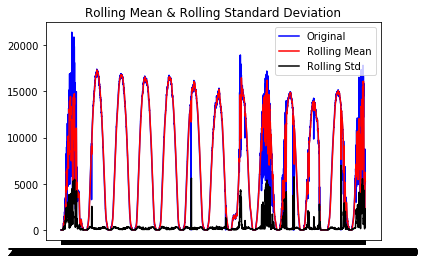

In [19]:
rolling_mean = df.rolling(window = 902).mean()
rolling_std = df.rolling(window = 902).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

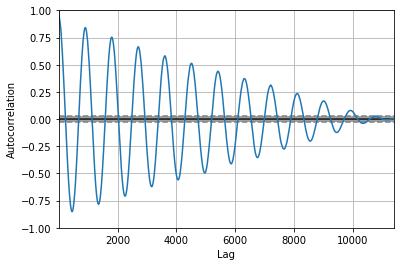

In [22]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(df)
pyplot.show()

In [26]:
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = df(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.power (W)   No. Observations:                11388
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -94117.992
Method:                       css-mle   S.D. of innovations            939.846
Date:                Sat, 14 Dec 2019   AIC                         188249.985
Time:                        10:59:33   BIC                         188301.367
Sample:                             1   HQIC                        188267.265
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4566      4.882      0.094      0.925      -9.112      10.025
ar.L1.D.power (W)    -0.2557      0.009    -27.366      0.000      -0.274      -0.237
ar.L2.D.power (W)    -0.

TypeError: ignored

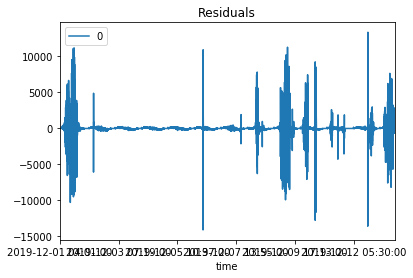

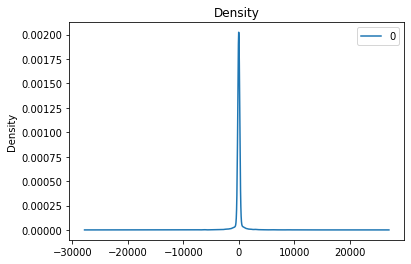

In [30]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
residuals.plot(kind='kde', title='Density')
plt.show()